**LSTM:**

![jupyter](./LSTM.png)

**BI-LSTM:**
![jupyter](./bi-LSTM.png)

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 653s 2s/step - loss: 0.5205 - accuracy: 0.7419 - val_loss: 0.5646 - val_accuracy: 0.7804
Epoch 2/10
391/391 [==============================] - 652s 2s/step - loss: 0.3847 - accuracy: 0.8449 - val_loss: 0.4287 - val_accuracy: 0.8128
Epoch 3/10
391/391 [==============================] - 650s 2s/step - loss: 0.3174 - accuracy: 0.8763 - val_loss: 0.4118 - val_accuracy: 0.8346
Epoch 4/10
391/391 [==============================] - 687s 2s/step - loss: 0.2516 - accuracy: 0.9049 - val_loss: 0.4768 - val_accuracy: 0.8173
Epoch 5/10
391/391 [==============================] - 928s 2s/step - loss: 0.3004 - accuracy: 0.8785 - val_loss: 0.4542 - val_accuracy: 0.7934
Epoch 6/10
391/391 [==============================] - 915s 2s/step - loss: 0.2186 - accuracy: 0.9187 - val_loss: 0.4940 - val_accuracy: 0.8169
Epoch 7/10
391/391 [==============================] - 649s 2s/step - loss: 0.3953 - accuracy: 0.8270 - val_loss: 0.4903 - val_accuracy: 0.7748

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

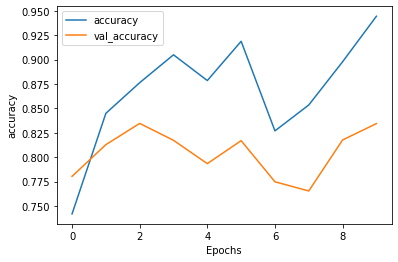

In [10]:
plot_graphs(history, 'accuracy')

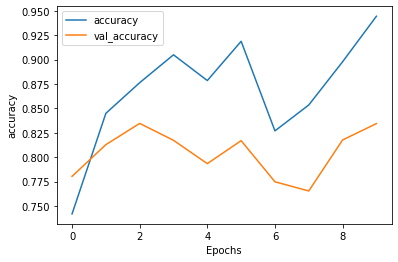

In [11]:
plot_graphs(history, 'accuracy')